In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima


In [11]:
df=pd.read_csv('U.S._Natural_Gas_Total_Consumption.csv')
df.Month = pd.to_datetime(df.Month)
df.set_index('Month', inplace=True)
df = df.reindex(index=df.index[::-1]) #switching the DF around for proper indexing
df.index.freq='MS'

In [4]:
auto_order=auto_arima(df.Cons
                       , max_order=10
                       , d=1, D=1, m=12
                       , max_p=4, max_q=4, max_P=4, max_Q=4
                       , stepwise=False
                       , suppress_warnings=True
                      )
auto_order

ARIMA(maxiter=50, method='lbfgs', order=(2, 1, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(2, 1, 4, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

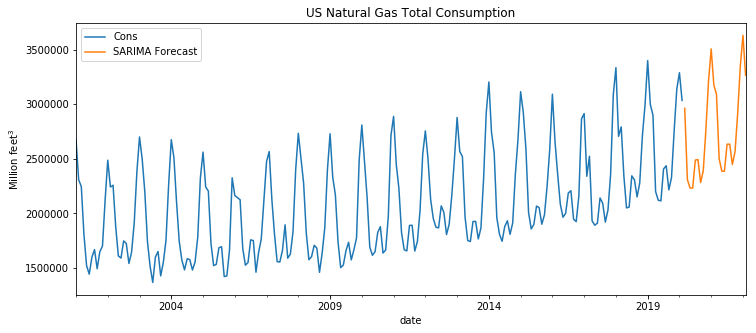

In [3]:
#ARIMA(2,1,0)x(2,1,4,12)
model=SARIMAX(df.Cons, order=(2,1,0), seasonal_order=(2,1,4,12))
results=model.fit()
results.summary()
fcast=results.predict(len(df), len(df)+23).rename('SARIMA Forecast')
title="US Natural Gas Total Consumption"
ylabel="Million feet$^3$"
xlabel="date"

ax = df.Cons.plot(legend=True, figsize=(12,5), title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [9]:
np.sqrt(results.mse)

240878.024086531